## **Bitcoin Price Prediction using Deep Learning**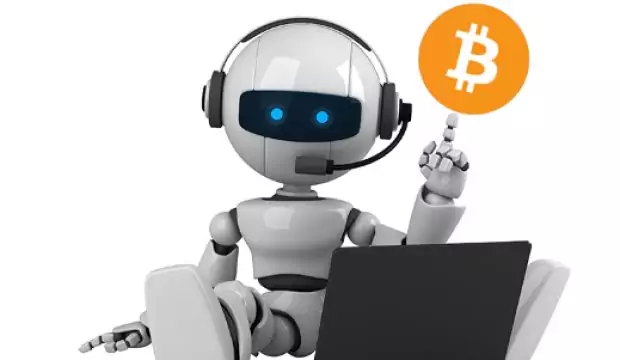



# **Load Data**

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 21.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [ ]:

print("Hint: Bitcoin-BTC ; Fiat-USD/INR")
crypto=input("Enter CryptoCurrency:")
fiat=input("Enter Fiat:")
s=crypto+'-'+fiat
df=yf.download(s)
df

Hint: Bitcoin-BTC ; Fiat-USD/INR
Enter CryptoCurrency:BTC
Enter Fiat:USD
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-02-14,42157.398438,42775.777344,41681.957031,42586.917969,42586.917969,20827783012
2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657


# **Data Processing**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
prediction_days=60
future_day=1

x_train,y_train=[],[]

for x in range(prediction_days,len(scaled_data)-future_day):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x+future_day,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# **LSTM Model**

In [ ]:
model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
83/83 [==============================] - 15s 99ms/step - loss: 0.0064
Epoch 2/25
83/83 [==============================] - 8s 93ms/step - loss: 0.0022
Epoch 3/25
83/83 [==============================] - 8s 95ms/step - loss: 0.0024
Epoch 4/25
83/83 [==============================] - 8s 91ms/step - loss: 0.0018
Epoch 5/25
83/83 [==============================] - 8s 93ms/step - loss: 0.0018
Epoch 6/25
83/83 [==============================] - 9s 112ms/step - loss: 0.0016
Epoch 7/25
83/83 [==============================] - 8s 97ms/step - loss: 0.0020
Epoch 8/25
83/83 [==============================] - 8s 96ms/step - loss: 0.0015
Epoch 9/25
83/83 [==============================] - 8s 95ms/step - loss: 0.0015
Epoch 10/25
83/83 [==============================] - 8s 95ms/step - loss: 0.0014
Epoch 11/25
83/83 [==============================] - 8s 93ms/step - loss: 0.0014
Epoch 12/25
83/83 [==============================] - 8s 94ms/step - loss: 0.0013
Epoch 13/25
83/83 [================

In [ ]:
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()

test_data=yf.download(s,start=test_start,end=test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((df['Close'],test_data['Close']),axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)

x_test=[]
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)


[*********************100%***********************]  1 of 1 completed


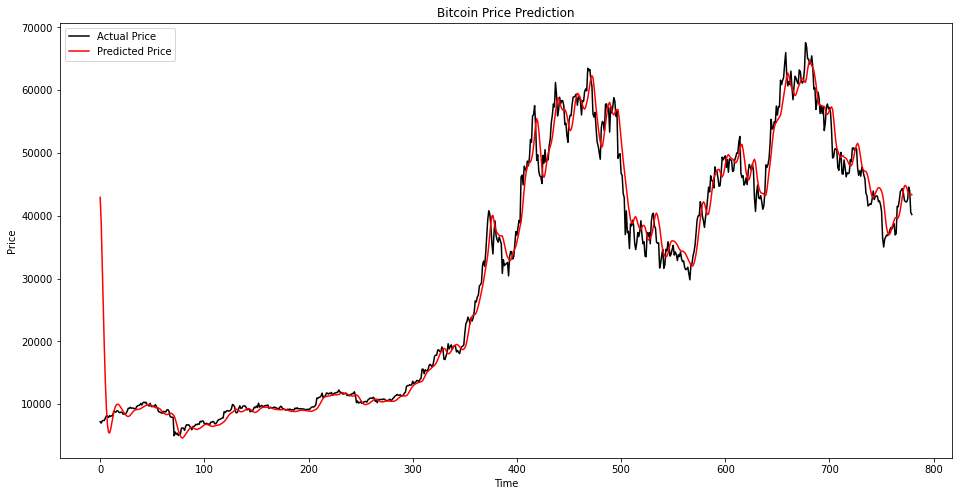

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(actual_prices,color='black',label='Actual Price')
plt.plot(prediction_prices,color='red',label='Predicted Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

**Future Price**

In [ ]:
ftr=0
real_data=[model_inputs[len(model_inputs)+ftr-prediction_days:len(model_inputs)+ftr,0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

pred_price=model.predict(real_data)
pred_price=scaler.inverse_transform(pred_price)
print("Future price:",pred_price)

Future price: [[42936.7]]
